In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('C:/Users/lenovo/Downloads/25-09-2022-TO-25-09-2023-RELIANCE-ALL-N.csv')

In [4]:
print('shape of data',df.shape)
df.head()

shape of data (250, 15)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,26-Sep-2022,"2,439.50","2,394.05","2,417.80","2,375.15","2,378.15","2,377.35","2,392.03","5,759,298","13,776,401,753.70","334,638","3,259,263",56.59
1,RELIANCE,EQ,27-Sep-2022,"2,377.35","2,394.00","2,426.00","2,360.10","2,394.00","2,396.25","2,390.70","7,455,448","17,823,738,488.00","295,538","4,199,383",56.33
2,RELIANCE,EQ,28-Sep-2022,"2,396.25","2,360.35","2,378.00","2,327.10","2,330.50","2,332.45","2,353.58","7,844,140","18,461,791,856.30","387,724","4,421,083",56.36
3,RELIANCE,EQ,29-Sep-2022,"2,332.45","2,360.00","2,367.50","2,313.00","2,328.00","2,325.30","2,334.53","6,771,046","15,807,234,115.85","288,225","4,318,113",63.77
4,RELIANCE,EQ,30-Sep-2022,"2,325.30","2,311.00","2,402.00","2,311.00","2,376.15","2,377.75","2,371.60","8,589,908","20,371,810,194.00","264,760","5,032,369",58.58


In [5]:
print(df.columns)

Index(['Symbol  ', 'Series  ', 'Date  ', 'Prev Close  ', 'Open Price  ',
       'High Price  ', 'Low Price  ', 'Last Price  ', 'Close Price  ',
       'Average Price ', 'Total Traded Quantity  ', 'Turnover ₹  ',
       'No. of Trades  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  '],
      dtype='object')


In [6]:
df.dtypes

Symbol                      object
Series                      object
Date                        object
Prev Close                  object
Open Price                  object
High Price                  object
Low Price                   object
Last Price                  object
Close Price                 object
Average Price               object
Total Traded Quantity       object
Turnover ₹                  object
No. of Trades               object
Deliverable Qty             object
% Dly Qt to Traded Qty      object
dtype: object

In [7]:
#create df_1 with 2 columns date and closing price columns 
df_1 = df[['Date  ', 'Close Price  ']]
df_1.head()

,Date,Close Price
0,26-Sep-2022,"2,377.35"
1,27-Sep-2022,"2,396.25"
2,28-Sep-2022,"2,332.45"
3,29-Sep-2022,"2,325.30"
4,30-Sep-2022,"2,377.75"


In [8]:
#renaming the columns
df_1.rename(columns = {'Date  ':'Date','Close Price  ':'Close_Price'}, inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9340\4086993975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Date  ':'Date','Close Price  ':'Close_Price'}, inplace = True)


In [9]:
df_1.head()

,Date,Close_Price
0,26-Sep-2022,"2,377.35"
1,27-Sep-2022,"2,396.25"
2,28-Sep-2022,"2,332.45"
3,29-Sep-2022,"2,325.30"
4,30-Sep-2022,"2,377.75"


In [10]:
# Convert Month into Datetime

df_1['Date'] = pd.to_datetime(df_1['Date'])

#df_1['Date  '] = pd.to_datetime(df_1['Date  '].str.strip())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9340\95893366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Date'] = pd.to_datetime(df_1['Date'])


In [11]:
# Remove commas and then convert 'Column_Name' to a numeric data type
df_1['Close_Price'] = pd.to_numeric(df_1['Close_Price'].str.replace(',', ''), errors='coerce')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9340\3056376070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Close_Price'] = pd.to_numeric(df_1['Close_Price'].str.replace(',', ''), errors='coerce')


In [12]:
df_1.dtypes

Date           datetime64[ns]
Close_Price           float64
dtype: object

In [13]:
df_1.set_index('Date',inplace=True)

In [14]:
df_1.head()

,Close_Price
Date,
2022-09-26,2377.35
2022-09-27,2396.25
2022-09-28,2332.45
2022-09-29,2325.30
2022-09-30,2377.75


<AxesSubplot:xlabel='Date'>

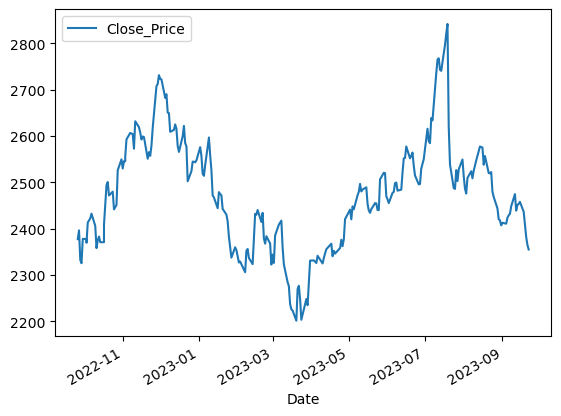

In [15]:
df_1.plot()

In [16]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df_1['Close_Price'])

In [18]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close_price):
    result = adfuller(close_price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_1['Close_Price'])

ADF Test Statistic : -2.4081624898119114
p-value : 0.13944584734714038
#Lags Used : 1
Number of Observations Used : 248
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


Figure out Order for ARIMA model

In [19]:
from pmdarima import auto_arima

In [20]:
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_1['Close_Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2449.330, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3105.239, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2449.788, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2844.521, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4619.032, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2447.294, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2687.451, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2446.074, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2447.625, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2445.630, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2447.615, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2449.601, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.322 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1218.815
Date:                Thu, 05 Oct 2023   AIC                           2445.630
Time:                        22:08:22   BIC                           2459.716
Sample:                             0   HQIC                          2451.299
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    101.4492     36.692      2.765      0.006      29.534     173.364
ar.L1          1.1140      0.068     16.271      0.000       0.980       1.248
ar.L2         -0.1553      0.070     -2.210      0.027      -0.293      -0.018
sigma2       998.8947     55.233     18.085      0.000     890.639    1107.150
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               613.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.77
Prob(H) (two-sided):                  0.09   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARIMA

Split Data into Training and Testing

In [22]:
print(df.shape)
train = df_1.iloc[:-30]
test = df_1.iloc[-30:]
print(train.shape , test.shape)

(250, 15)
(220, 1) (30, 1)


Train the Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['Close_Price'], order=(2,0,0))
model = model.fit()

# Print the model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            Close_Price   No. Observations:                  220
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1080.640
Date:                Thu, 05 Oct 2023   AIC                           2169.280
Time:                        22:08:22   BIC                           2182.855
Sample:                             0   HQIC                          2174.762
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2476.4899     51.847     47.765      0.000    2374.872    2578.108
ar.L1          1.1126      0.074     15.047      0.000       0.968       1.258
ar.L2         -0.1556      0.076     -2.054      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Make Prredictions on Test set

In [24]:
start = len(train)
end = len(train)+len(test)-1
predection = model.predict(start = start , end = end , typ ='levels')
#print(predection)

#To take dates as index
predection.index = df_1.index[start:end+1]
print(predection)

Date
2023-08-10    2525.682033
2023-08-11    2523.642829
2023-08-14    2521.298908
2023-08-16    2519.008307
2023-08-17    2516.824450
2023-08-18    2514.751064
2023-08-21    2512.783982
2023-08-22    2510.917986
2023-08-23    2509.147919
2023-08-24    2507.468856
2023-08-25    2505.876119
2023-08-28    2504.365270
2023-08-29    2502.932100
2023-08-30    2501.572613
2023-08-31    2500.283023
2023-09-01    2499.059735
2023-09-04    2497.899340
2023-09-05    2496.798606
2023-09-06    2495.754464
2023-09-07    2494.764005
2023-09-08    2493.824469
2023-09-11    2492.933238
2023-09-12    2492.087828
2023-09-13    2491.285883
2023-09-14    2490.525170
2023-09-15    2489.803567
2023-09-18    2489.119064
2023-09-20    2488.469754
2023-09-21    2487.853828
2023-09-22    2487.269568
Name: predicted_mean, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

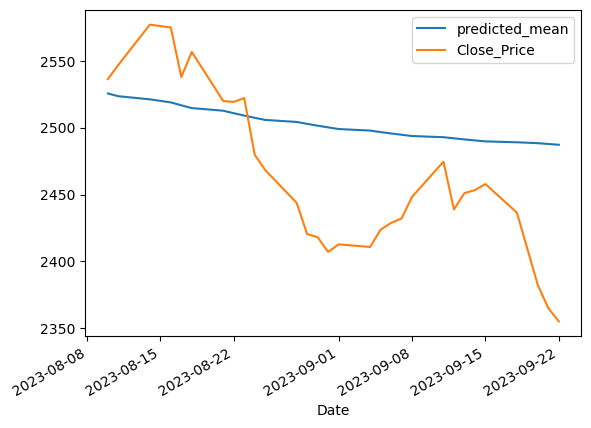

In [25]:
#PLOTTING (Root mena sq error to check the how good the fit is)
predection.plot(legend = True)
test['Close_Price'].plot(legend = True)

In [26]:
test['Close_Price'].mean()

2463.318333333333

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error (predection , test['Close_Price']))
print(rmse)

63.94728882547396


In [28]:
# FUTURE PREDICTIONS

In [34]:
model_2 =ARIMA (df_1['Close_Price'] , order=(2,0,0))
model_2 = model_2.fit()
df_1.tail()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close_Price
Date,
2023-09-15,2457.85
2023-09-18,2436.45
2023-09-20,2382.15
2023-09-21,2364.80
2023-09-22,2354.95


Future Dates

In [35]:
df_1.tail()

,Close_Price
Date,
2023-09-15,2457.85
2023-09-18,2436.45
2023-09-20,2382.15
2023-09-21,2364.80
2023-09-22,2354.95


In [36]:
index_future_dates = pd.date_range(start='2023-09-23' , end = '2023-11-23')
print(index_future_dates)

pred = model_2.predict(start = len(df_1) , end =len(df_1)+61 , type ='levels').rename('ARIMA Predictions')
pred.index= index_future_dates
print(pred)

DatetimeIndex(['2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30',
               '2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04',
               '2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
               '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
               '2023-10-13', '2023-10-14', '2023-10-15', '2023-10-16',
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24',
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28',
               '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05',
               '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09',
               '2023-11-10', '2023-11-11', '2023-11-12', '2023-11-13',
               '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17',
      

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

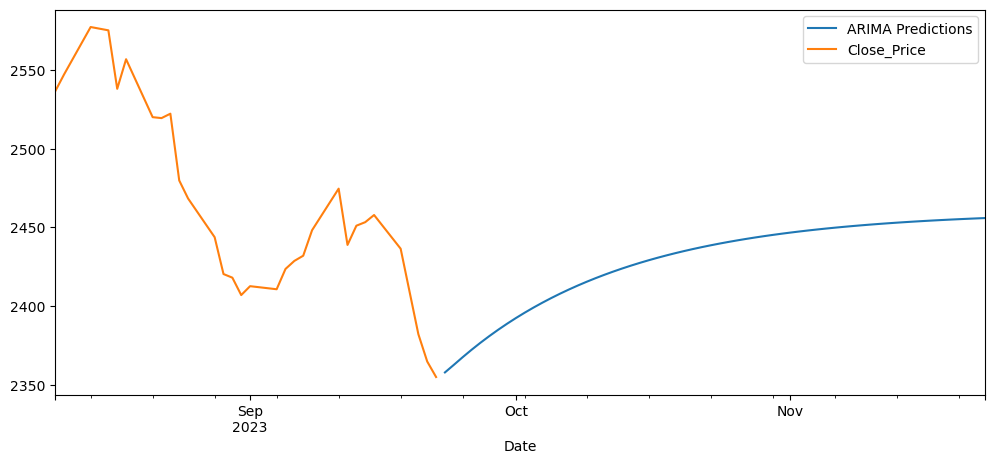

In [37]:
pred.plot(figsize =(12,5) , legend = True)
test['Close_Price'].plot(legend = True)